In [1]:
import pandas as pd
from drn_interactions.transforms.spikes import SpikesHandler
from drn_interactions.config import Config, ExperimentInfo
from drn_interactions.stats import auc, p_adjust
from drn_interactions.interactions.popcup import PopulationCoupling
from drn_interactions.interactions.preprocessors import InteractionsPreprocessor
from drn_interactions.interactions.loaders import BaseShockSlowInteractionsLoader
from drn_interactions.interactions.pairwise import PairwiseCorr, PairwisePartialCorr
from drn_interactions.interactions.runners import InteractionsRunner
from drn_interactions.io import load_derived_generic, load_neurons
from pingouin import pcorr

from drn_interactions.io import load_derived_generic

In [2]:
sessions = ExperimentInfo.foot_shock_sessions_10min
session = sessions[3]

loader = BaseShockSlowInteractionsLoader(block="pre", session_name=session)
preprocessor = InteractionsPreprocessor(z=True)
pcorr = PairwisePartialCorr()
corr = PairwiseCorr()
pcup = PopulationCoupling()

runner = InteractionsRunner(loader=loader, preprocessor=preprocessor, pcup=pcup, corr=corr, pcorr=pcorr)

In [4]:

# pcorr_frames = []
corr_frames = []
pcup_frames = []
for block in ("pre", "base_shock", "post_base_shock"):
    loader = BaseShockSlowInteractionsLoader(block=block, session_name=session)
    runner = InteractionsRunner(
        loader=loader, 
        preprocessor=preprocessor, 
        pcup=pcup, 
        corr=corr, 
        pcorr=pcorr
        )
    # pcorr_frames.append(runner.run_pcorr_multi(sessions=sessions).assign(block=block))
    corr_frames.append(runner.run_corr_multi(sessions=sessions).assign(block=block))
    pcup_frames.append(runner.run_pcup_multi(sessions=sessions).assign(block=block))

# df_pcorr = pd.concat(pcorr_frames).reset_index()
df_corr = pd.concat(corr_frames).reset_index()
df_pcup = pd.concat(pcup_frames).reset_index()

<AxesSubplot:xlabel='block', ylabel='mag'>

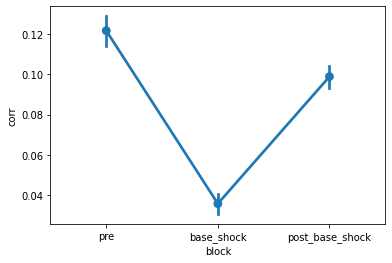

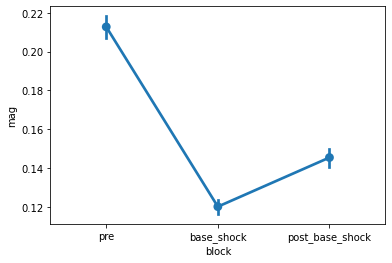

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pointplot(data=df_corr, x="block", y="corr")
plt.figure()
sns.pointplot(data=df_corr.assign(mag=lambda x: x["corr"].abs()), x="block", y="mag")

<AxesSubplot:xlabel='block', ylabel='mag'>

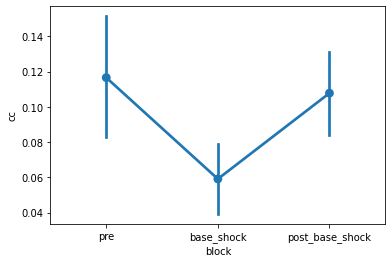

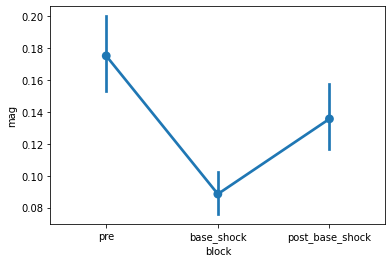

In [7]:
plt.figure()
sns.pointplot(data=df_pcup, x="block", y="cc")
plt.figure()
sns.pointplot(data=df_pcup.assign(mag=lambda x: x["cc"].abs()), x="block", y="mag")